# A/B Testing on Marketing Campaigns

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('campaigns.csv')
df.head()

,OutletID,MarketSize,AgeofOutlets,Campaigns,Week,SalesInThousands
0,1,Medium,4,3,1,33.73
1,1,Medium,4,3,2,35.67
2,1,Medium,4,3,3,29.03
3,1,Medium,4,3,4,39.25
4,2,Medium,5,2,1,27.81


In [14]:
print(f'Rows            : {df.shape[0]}')
print(f'Columns         : {df.shape[1]}')
print(f'Features        : {df.columns.tolist()}')
print(f'Missing Values  : {df.isnull().values.sum()}')
print(f'Unique Values   : \n\n{df.nunique()}')

Rows            : 548
Columns         : 6
Features        : ['OutletID', 'MarketSize', 'AgeofOutlets', 'Campaigns', 'Week', 'SalesInThousands']
Missing Values  : 0
Unique Values   : 

OutletID            137
MarketSize            3
AgeofOutlets         25
Campaigns             3
Week                  4
SalesInThousands    517
dtype: int64


In [15]:
df.describe()

,OutletID,AgeofOutlets,Campaigns,Week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000
mean,479.656934,8.503650,2.029197,2.500000,53.466204
std,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,17.340000
25%,216.000000,4.000000,1.000000,1.750000,42.545000
50%,504.000000,7.000000,2.000000,2.500000,50.200000
75%,708.000000,12.000000,3.000000,3.250000,60.477500
max,920.000000,28.000000,3.000000,4.000000,99.650000


# EDA and Visualizations

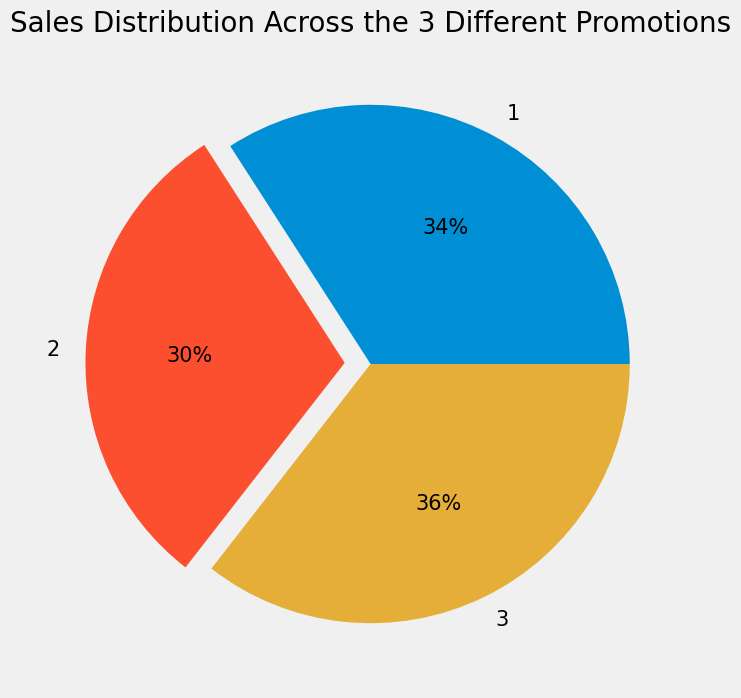

In [16]:
# Create some plots to visual our sales and marketing data
# Using fivethirtyeight style on matplotlib

plt.style.use('fivethirtyeight')
ax = df.groupby('Campaigns').sum()['SalesInThousands'].plot.pie(figsize=(8,8),
                                                                autopct='%1.0f%%',
                                                                explode = (0, 0.1, 0),
                                                                textprops = {'fontsize' : 15})
ax.set_ylabel('')
ax.set_title('Sales Distribution Across the 3 Different Promotions', fontsize = 20)

plt.show()

In [17]:
# Now let's view the promotions for each market size
df.groupby(['Campaigns', 'MarketSize']).count()['OutletID']

Campaigns  MarketSize
1          Large          56
           Medium         96
           Small          20
2          Large          64
           Medium        108
           Small          16
3          Large          48
           Medium        116
           Small          24
Name: OutletID, dtype: int64

In [18]:
# Using unstack
df.groupby(['Campaigns', 'MarketSize']).count()['OutletID'].unstack('MarketSize')

MarketSize,Large,Medium,Small
Campaigns,,,
1,56,96,20
2,64,108,16
3,48,116,24


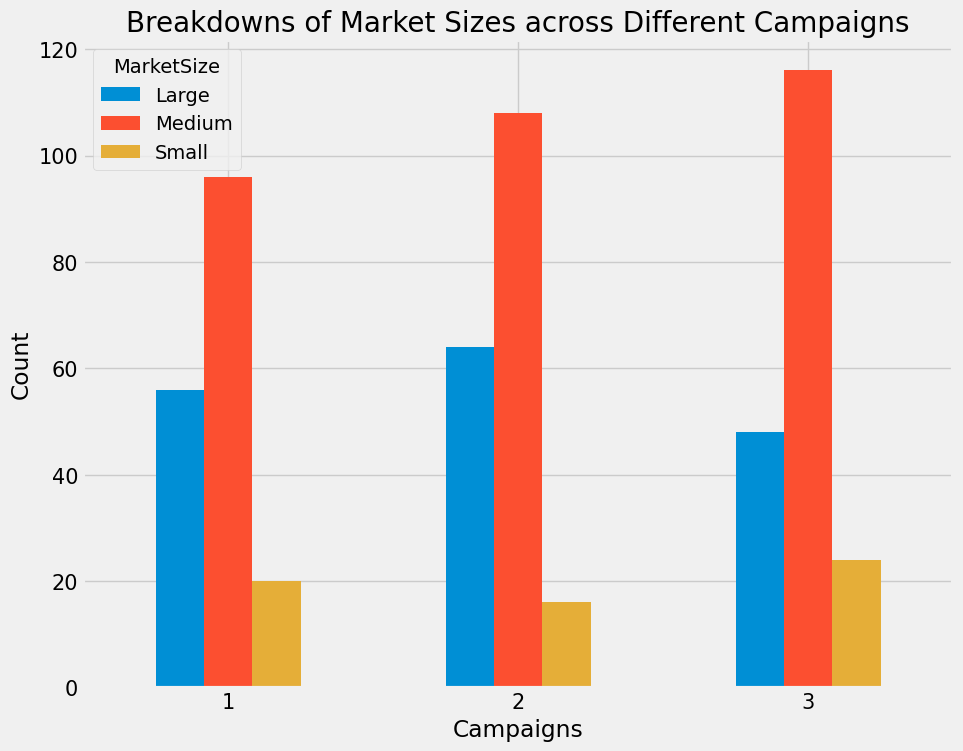

In [19]:
# Put this into a plot
ax = df.groupby(['Campaigns', 'MarketSize']).count()['OutletID'].unstack('MarketSize').plot(
    kind='bar',
    figsize=(10,8),
    grid=True)

ax.tick_params(axis = 'x', labelsize= 15)
plt.xticks(rotation = 'horizontal')
ax.tick_params(axis = 'y', labelsize = 15)
ax.set_ylabel('Count')
ax.set_title('Breakdowns of Market Sizes across Different Campaigns', fontsize = 20)

plt.show()

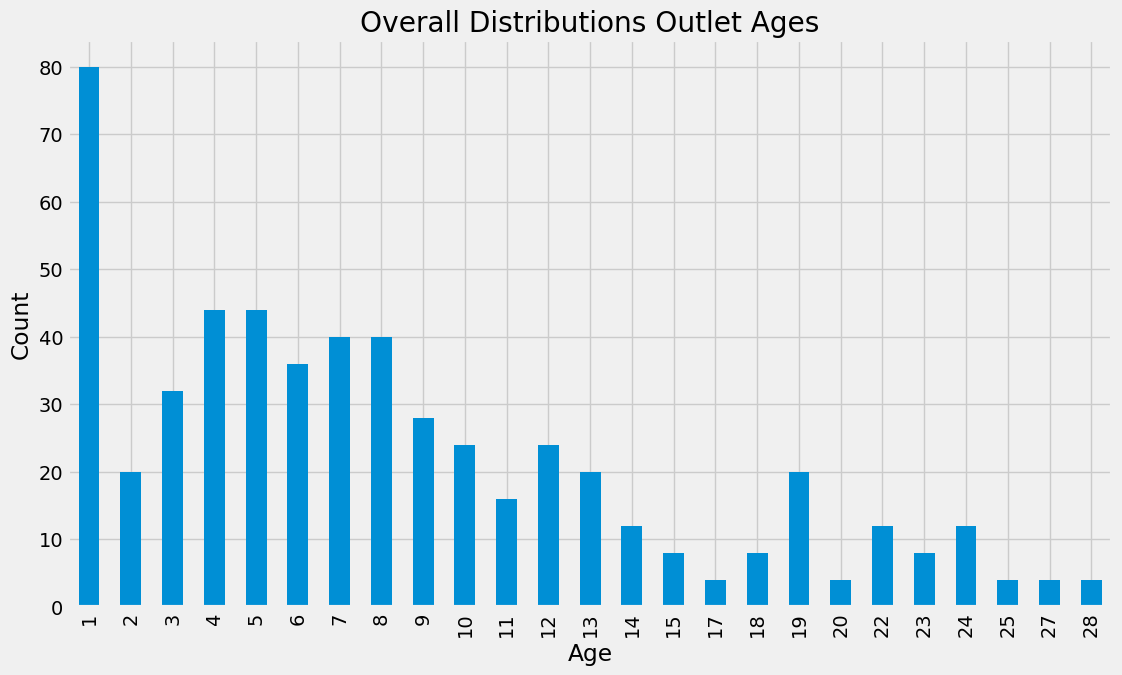

In [9]:
ax = df.groupby('AgeofOutlets').count()['OutletID'].plot(
    kind='bar', 
    figsize=(12,7),
    grid=True)

ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('Overall Distributions Outlet Ages')

plt.show()

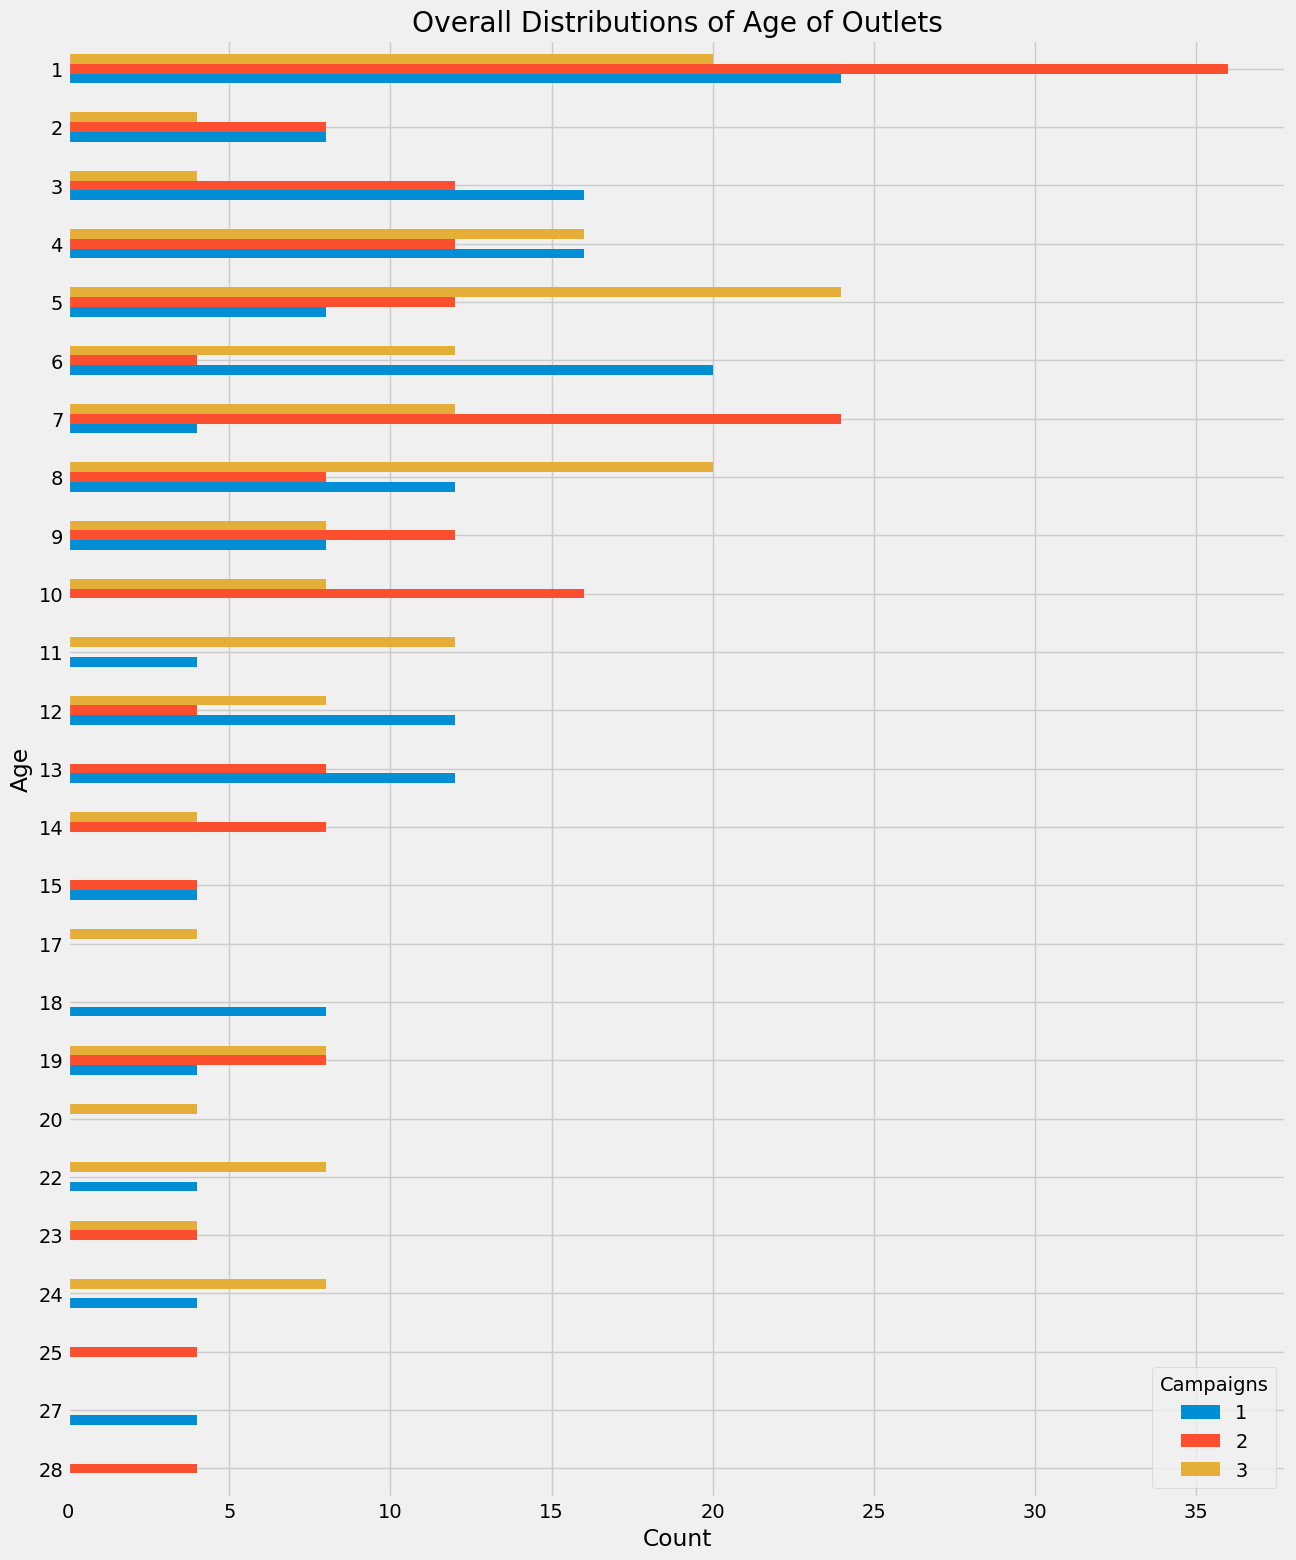

In [10]:
# Visualize this summary
ax = df.groupby(['AgeofOutlets', 'Campaigns']).count()['OutletID'].unstack('Campaigns').iloc[::-1].plot(
    kind='barh', 
    figsize=(14,18),
    grid=True)
                                                                                                               
ax.set_ylabel('Age')
ax.set_xlabel('Count')
ax.set_title('Overall Distributions of Age of Outlets')

plt.show()

In [11]:
# Every campaigns has similar age profiles and the average outlet ages is around 8 ~ 9 years old
# Majority of the outlet are around 10 ~ 12 years old or younger

df.groupby('Campaigns').describe()['AgeofOutlets']

,count,mean,std,min,25%,50%,75%,max
Campaigns,,,,,,,,
1,172.0,8.279070,6.636160,1.0,3.0,6.0,12.0,27.0
2,188.0,7.978723,6.597648,1.0,3.0,7.0,10.0,28.0
3,188.0,9.234043,6.651646,1.0,5.0,8.0,12.0,24.0


# Performing A/B Testing on Three Marketing Campaigns

In [26]:
df.groupby(['Campaigns']).agg({'SalesInThousands':'count'})

,SalesInThousands
Campaigns,
1,172
2,188
3,188


In [27]:
means = df.groupby(['Campaigns']).agg({'SalesInThousands':'mean'})
stdev = df.groupby(['Campaigns']).agg({'SalesInThousands':'std'})
obs = df.groupby(['Campaigns']).agg({'SalesInThousands':'count'})
print(f'===== MEAN ====== \n{means}\n')
print(f'===== STANDARD DEVIATION ====== \n{stdev}\n')
print(f'===== OBSERVATIONS ====== \n{obs}\n')

===== MEAN ====== 
           SalesInThousands
Campaigns                  
1                 58.099012
2                 47.329415
3                 55.364468

===== STANDARD DEVIATION ====== 
           SalesInThousands
Campaigns                  
1                 16.553782
2                 15.108955
3                 16.766231

===== OBSERVATIONS ====== 
           SalesInThousands
Campaigns                  
1                       172
2                       188
3                       188



# A/B Testing: 1st Campaigns vs 2nd Campaigns

In [31]:
# Computing the t and p values using scipy 

t, p = stats.ttest_ind(df.loc[df['Campaigns'] == 1, 'SalesInThousands'].values,
                       df.loc[df['Campaigns'] == 2, 'SalesInThousands'].values, 
                       equal_var=False)
print(f't-value = {str(t)}')
print(f'p-value = {str(p)}')

t-value = 6.42752867090748
p-value = 4.2903687179871785e-10


# Analysis of P and t-values (1 vs 2)

Т.к. значение p-value близко к нулю, мы можем **отклонить нулевую гипотезу**. Это означает, что существует статистическая разница между данными группами. (обычно граница отклонения нулевой гипотезы составляет менее 0.05)

Более того, значение статистики t-теста также показывает, что разница между двумя маркетинговыми кампаниями существенна, и первая кампания показывает себя лучше чем вторая.

***

# A/B Testing: 1st Campaigns vs 3rd Campaigns

However, if we run a t-test between the promotion group 1 and promotion group 3, we see different results:

In [32]:
t, p = stats.ttest_ind(
    df.loc[df['Campaigns'] == 1, 'SalesInThousands'].values, 
    df.loc[df['Campaigns'] == 3, 'SalesInThousands'].values, 
    equal_var = False)

print(f't-value = {str(t)}')
print(f'p-value = {str(p)}')

t-value = 1.5560224307758634
p-value = 0.1205914774222948


# Analysis of P and t-values (1 vs 3)

Заметим, что при изначальном анализе данных, мы получили, что средний доход с продаж по 1 стратегии (58.1) больше чем по 3 стратегии (55.36).
Но, запуская t-тест между данными группами, мы получаем статистический вывод о том, что **p-value сильно превышает порог доверия в 0.05**, что означает, что статистической разницы нет.

***

# A/B Testing: 2nd Campaigns vs 3rd Campaigns

In [33]:
t, p = stats.ttest_ind(
    df.loc[df['Campaigns'] == 2, 'SalesInThousands'].values, 
    df.loc[df['Campaigns'] == 3, 'SalesInThousands'].values, 
    equal_var = False)

print(f't-value = {str(t)}')
print(f'p-value = {str(p)}')

t-value = -4.88139271089348
p-value = 1.5692733176039894e-06


# Analysis of P and t-values (2 vs 3)

Заметим, что при изначальном анализе данных, мы получили, что средний доход с продаж по 2 стратегии (47.33) меньше чем по 3 стратегии (55.36).
Запуская t-тест между данными группами, мы получаем статистический вывод о том, что **p-value меньше порога доверия в 0.05**, что означает, что существует статистическая разница между данными группами.